In [1]:
# load spreadsheet of returns from Damodaran website into pandas dataframe
# damodaran sheet has average cpi over the year
# IMO this is laggy, should resample monthly to last but will leave it for now

In [2]:
import pandas as pd
import pandas_datareader as pdr

#wjs data_xls = 'http://www.stern.nyu.edu/~adamodar/pc/datasets/histretSP.xls'
data_xls = './histretSP.xls'
data_sheet = "Returns by year"
# these 2 lines below may change as rows get added on Damodaran website

skiprows = range(19)
skipfooter = 13
download_df = pd.read_excel(data_xls, 
                         sheet_name=data_sheet, 
                         skiprows=skiprows,
                         skipfooter=skipfooter)
download_df = download_df.set_index('Year')
download_df.to_pickle('histretSP.pickle')
download_df[-15:]

,S&P 500 (includes dividends),3-month T.Bill,US T. Bond (10-year),Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,Baa Corporate Bond2,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
Year,,,,,,,,,,,,,,,,,,,,,
2009,0.259352,0.001505,-0.111167,0.202096,-0.038553,0.250359,142344.873559,1975.366835,5344.645583,24401.632090,...,0.370519,0.057256,0.042869,0.028141,0.224883,-0.025907,-0.135495,0.169194,-0.064868,0.216136
2010,0.148211,0.001384,0.084629,0.094105,-0.041128,0.292414,163441.938624,1978.101656,5796.959405,26697.946972,...,0.063582,0.054106,0.043109,0.014378,0.131936,-0.012809,0.069256,0.078597,-0.054719,0.274095
2011,0.020984,0.000528,0.160353,0.122629,-0.038853,0.120242,166871.562968,1979.146885,6726.521265,29971.892533,...,-0.139370,-0.101645,0.040970,0.030621,-0.009351,-0.029198,0.125878,0.089275,-0.067410,0.086958
2012,0.158906,0.000876,0.029716,0.093271,0.064372,0.056843,193388.430926,1980.880617,6926.404686,32767.389936,...,0.129190,0.065635,0.041988,0.017595,0.138867,-0.016430,0.011911,0.074367,0.045968,0.038570
2013,0.321451,0.000571,-0.091046,-0.009828,0.107132,-0.276142,255553.308086,1982.011304,6295.785407,32445.355599,...,0.412497,0.331279,0.046177,0.015128,0.301757,-0.014341,-0.104592,-0.024584,0.090633,-0.286929
2014,0.135244,0.000327,0.107462,0.107818,0.045071,0.001245,290115.415011,1982.659818,6972.341867,35943.540912,...,0.027782,0.027426,0.045975,0.006531,0.127878,-0.006164,0.100276,0.100629,0.038290,-0.005252
2015,0.013789,0.000520,0.012843,-0.015009,0.052000,-0.121061,294115.792218,1983.691433,7061.887631,35404.081135,...,0.000946,0.028797,0.045434,0.006387,0.007355,-0.005830,0.006415,-0.021260,0.045323,-0.126640
2016,0.117731,0.003161,0.006906,0.115245,0.053045,0.081038,328742.282302,1989.962278,7110.653529,39484.215229,...,0.110825,0.002486,0.046177,0.020508,0.095269,-0.016998,-0.013329,0.092833,0.031883,0.059313
2017,0.216055,0.009341,0.028017,0.092339,0.062070,0.126625,399768.635072,2008.550914,7309.873866,43130.150176,...,0.188038,0.123716,0.047687,0.021299,0.190694,-0.011709,0.006578,0.069558,0.039920,0.103129


In [3]:
series = ['CPIAUCSL']

cpi_download = pdr.data.DataReader(series, 
                                   'fred', 
                                   start='1947-01-01')

cpi_download = cpi_download.reset_index()
cpi_download = cpi_download.resample('A', on='DATE').mean().reset_index()
# ? cpi_download = cpi_download.resample('A', on='DATE').last()
cpi_download = cpi_download.set_index(pd.DatetimeIndex(cpi_download['DATE']).year)

cpi_download['PCT_CHG'] = cpi_download['CPIAUCSL'].pct_change()
cpi_download[-15:]

,DATE,CPIAUCSL,PCT_CHG
DATE,,,
2009,2009-12-31,214.564667,-0.003204
2010,2010-12-31,218.076167,0.016366
2011,2011-12-31,224.923000,0.031397
2012,2012-12-31,229.586083,0.020732
2013,2013-12-31,232.951750,0.014660
2014,2014-12-31,236.715000,0.016155
2015,2015-12-31,237.001750,0.001211
2016,2016-12-31,240.005417,0.012674
2017,2017-12-31,245.121000,0.021314


<Axes: >

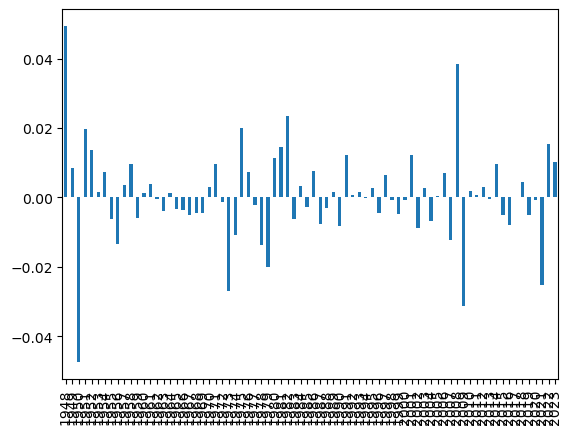

In [4]:
(cpi_download['PCT_CHG']-download_df['Inflation Rate']).dropna().plot.bar()

<Axes: xlabel='Year'>

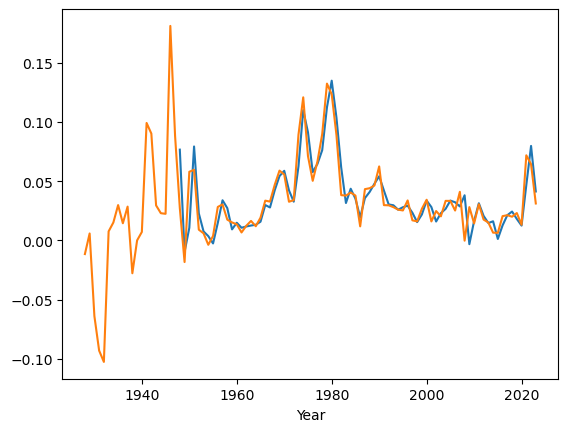

In [5]:
cpi_download['PCT_CHG'].plot()
download_df['Inflation Rate'].plot()

In [6]:
series = ['CPIAUCSL']

cpi_download = pdr.data.DataReader(series, 
                                   'fred', 
                                   start='1947-01-01')

cpi_download = cpi_download.reset_index()
cpi_download = cpi_download.resample('A', on='DATE').last()
#cpi_download = cpi_download.set_index(pd.DatetimeIndex(cpi_download['DATE']).year)
cpi_download = cpi_download.set_index(pd.DatetimeIndex(cpi_download.index).year)

cpi_download['PCT_CHG'] = cpi_download['CPIAUCSL'].pct_change()
cpi_download[-15:]

,CPIAUCSL,PCT_CHG
DATE,,
2009,217.347,0.028141
2010,220.472,0.014378
2011,227.223,0.030621
2012,231.221,0.017595
2013,234.719,0.015128
2014,236.252,0.006531
2015,237.761,0.006387
2016,242.637,0.020508
2017,247.805,0.021299


<Axes: >

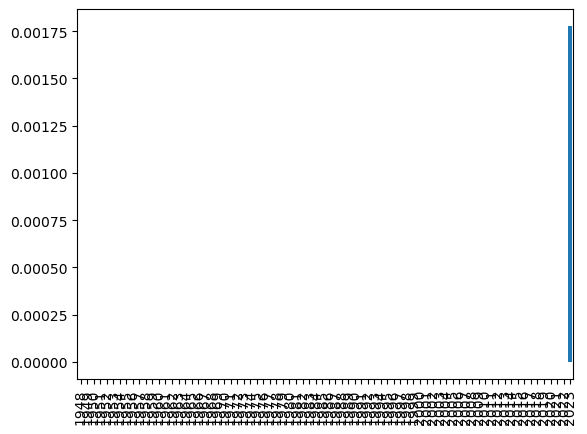

In [7]:
(cpi_download['PCT_CHG']-download_df['Inflation Rate']).dropna().plot.bar()